# Проект, часть 2.
## Лайко Рудольф, ИАД_04

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Данные и признаки
(честно говоря, воспринимал этот пункт как упражнение на знание инструментов языка и библиотеки pandas)

1. Загрузим данные в DataFrame data
2. Раскидаем признаки по отдельным DataFrame в соответствии с их типом
3. Учитывая специфику данных возьмем те признаки, количество значений которых больше 5. Это и будут всеми числовыми. Перенесем их из data в отдельный DF
4. Затем, заменим все "yes" и "no" в data на 1, 0, соответственно. С помощью генератора сделаем list из  имен признаков,        количестов значений которых равны 2 и имееют тип int64. Получим все бинарные признаки, т.к. ранее перенесли числовые в отдельный  DataFrame.
5. Все что осталось в data - категориальные признаки.

In [77]:
data = pd.read_csv('student-por.csv', sep = ";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [78]:
binary_df = pd.DataFrame()
categorical_df = pd.DataFrame()
numeric_df = pd.DataFrame()

In [79]:
numeric = [i for i in data.columns if len(set(data[i])) > 5]

for i in numeric:
    numeric_df[i] = data[i]
    data.drop(i, inplace=True,axis=1)

In [80]:
data = data.replace(["yes", "no"], [1, 0])

In [81]:
binary = [i for i in data.columns if len(set(data[i])) == 2 and data[i].dtype.name == "int64"]

for i in binary:
    binary_df[i] = data[i]
    data.drop(i, inplace=True,axis=1)

In [82]:
categorical = data.columns
# в data остались только категориальные признаки
categorical_df = categorical_df.append(data)

# 2. Обучение

* 1.Preproccesing. (будем использовать датафреймы, которые получили ранее)

   1.1. Преобразуем категориальные признаки, используя One-Hot-Encoding
   
   1.2. Аналогично пункту 4 в предыдущей секции поменяем "yes" и "no"  на 1, 0, соответственно.
   
   1.3. Такие категориальные признаки, как например school, не будем делать бинарными, не смотря на то, что там всего два значения. То есть такие признаки подходят под пункт 1.1.
   
   1.4. Исключим признаки G1, G2, так как они сильно корреллируют с целевой переменной G3.
   
  
   
* 2.Обучение моделей и их сравнение

    2.1. Linear Regression (+ Lasso, Ridge)
    
    2.2. Decision Tree
    
    2.3. Random Forest
    
    2.4. kNeighbors Regressor
    
    
* 3.Выбор наилучшей модели

    3.1. Feature scaling
    
    3.2. GridSearch
    
    3.3. Feature selecting

## 1.Preprocessing

In [83]:
from pandas import get_dummies

In [216]:
myData = pd.concat([pd.get_dummies(categorical_df), binary_df, numeric_df],axis=1)
target = myData["G3"]
temp_data = myData.copy(deep=True)
myData.drop(["G1", "G2", "G3"], inplace=True,axis=1)

In [201]:
myData.head()

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,...,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,age,absences
0,4,4,2,2,0,4,3,4,1,1,...,1,0,0,0,1,1,0,0,18,4
1,1,1,1,2,0,5,3,3,1,1,...,0,1,0,0,0,1,1,0,17,2
2,1,1,1,2,0,4,3,2,2,3,...,1,0,0,0,1,1,1,0,15,6
3,4,2,1,3,0,3,2,2,1,1,...,0,1,0,1,1,1,1,1,15,0
4,3,3,1,2,0,4,3,2,1,2,...,0,1,0,0,1,1,0,0,16,0


## 2. Обучение моделей и их сравнение

### 2.1 Linear Regression

In [86]:
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import sklearn.preprocessing 
import sklearn.neighbors
from sklearn.cross_validation import cross_val_score


In [87]:
data_train, data_test, target_train, target_test = train_test_split(myData, target, test_size=0.2)

In [88]:
lr = LinearRegression()
lr.fit(data_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
lrError = np.sqrt(-(cross_val_score(lr, data_test, target_test, scoring='mean_squared_error',cv=5)))
lrScore = lr.score(myData, target)
print("Linear Regression RMSE: ", lrError)
print("Linear Regression R2: ", lrScore)

Linear Regression RMSE:  [ 3.1881655   2.78369551  3.10941851  4.08799425  3.44460844]
Linear Regression R2:  0.345609478971


### Lasso

Сразу найдем оптимальный параметр с помощью GridSearch

In [90]:
from sklearn.grid_search import GridSearchCV

In [91]:
lrLasso = Lasso(alpha = 0.04)
lrLasso.fit(data_train, target_train)

Lasso(alpha=0.04, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [92]:
alphas = np.linspace(-1, 50)
grid = GridSearchCV(estimator=lrLasso, param_grid=dict(alpha=alphas))

grid.fit(data_train, target_train)
print(grid)

print("\nЛучшее значение гиперпараметра гиперпараметра для Lasso: ", grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=0.04, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([ -1.00000e+00,   4.08163e-02,   1.08163e+00,   2.12245e+00,
         3.16327e+00,   4.20408e+00,   5.24490e+00,   6.28571e+00,
         7.32653e+00,   8.36735e+00,   9.40816e+00,   1.04490e+01,
         1.14898e+01,   1.25306e+01,   1.35714e+01,   1.46122e+01,
         1....    4.47959e+01,   4.58367e+01,   4.68776e+01,   4.79184e+01,
         4.89592e+01,   5.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

Лучшее значение гиперпараметра гиперпараметра для Lasso:  0.0408163265306


In [93]:
lrLassoError = np.sqrt(-(cross_val_score(lrLasso, data_test, target_test, scoring='mean_squared_error',cv=5)))
lrLassoScore = lrLasso.score(myData, target)
print("Lasso RMSE: ", lrLassoError)
print("Lasso R2: ", lrLassoScore)

Lasso RMSE:  [ 2.65656344  2.42839256  2.84815668  3.8373581   3.00707862]
Lasso R2:  0.335081297865


### Ridge

Аналогично Lasso

In [94]:
lrRidge = Ridge(alpha = 10)
lrRidge.fit(data_train, target_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [95]:
alphas = np.logspace(-50, 50)
grid = GridSearchCV(estimator=lrRidge, param_grid=dict(alpha = alphas))

grid.fit(myData, target)
print(grid)
print("\nЛучшее значение гиперпараметра для Ridge: ", grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-50,   1.09854e-48,   1.20679e-46,   1.32571e-44,
         1.45635e-42,   1.59986e-40,   1.75751e-38,   1.93070e-36,
         2.12095e-34,   2.32995e-32,   2.55955e-30,   2.81177e-28,
         3.08884e-26,   3.39322e-24,   3.72759e-22,   4.09492e-20,
         4....    6.25055e+39,   6.86649e+41,   7.54312e+43,   8.28643e+45,
         9.10298e+47,   1.00000e+50])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

Лучшее значение гиперпараметра для Ridge:  10.4811313415


In [96]:
lrRidgeError = np.sqrt(-(cross_val_score(lrRidge, data_test, target_test, scoring='mean_squared_error',cv=5)))
lrRidgeScore = lrRidge.score(data_test, target_test)
print("Lasso RMSE: ", lrRidgeError)
print("Lasso R2: ", lrRidgeScore)

Lasso RMSE:  [ 2.53461151  2.12491339  2.88856034  3.83048819  2.76243954]
Lasso R2:  0.187055086304


### 2.2. Decision Tree

In [98]:
from sklearn.tree import DecisionTreeRegressor

In [248]:
dt = DecisionTreeRegressor(random_state=1000)
len(data_train.columns)

48

In [226]:
splits = np.linspace(1, 15)
n_ftrs = np.arange(10, 49)
depth = np.linspace(50, 1000)
tuning = [{'min_samples_split': splits, 'max_features': n_ftrs}]

In [101]:
grid = GridSearchCV(estimator=dt, param_grid=tuning)
grid.fit(data_train, target_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1000,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'min_samples_split': array([  1.     ,   1.28571,   1.57143,   1.85714,   2.14286,   2.42857,
         2.71429,   3.     ,   3.28571,   3.57143,   3.85714,   4.14286,
         4.42857,   4.71429,   5.     ,   5.28571,   5.57143,   5.85714,
         6.14286,   6.42857,   6.71429,   7.   ...   27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48])}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [102]:
print("Лучшее значение параметров DecisionTreeRegressor: ")
print("min_samples_split ", grid.best_estimator_.min_samples_split)
print("max_features", grid.best_estimator_.max_features )

Лучшее значение параметров DecisionTreeRegressor: 
min_samples_split  14.1428571429
max_features 13


In [103]:
TunedDt = DecisionTreeRegressor(min_samples_split = 13, max_features = 26, random_state=50)
TunedDt.fit(data_train, target_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=26,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=13,
           min_weight_fraction_leaf=0.0, presort=False, random_state=50,
           splitter='best')

In [104]:
TunedDtError = np.sqrt(-(cross_val_score(TunedDt, data_test, target_test, scoring='mean_squared_error',cv=5)))
TunedDtScore = TunedDt.score(myData, target)
print("DecisionTreeRegressor RMSE: ", TunedDtError)
print("DecisionTreeRegressor R2: ", TunedDtScore)

DecisionTreeRegressor RMSE:  [ 2.8799911   4.16263635  3.25513359  4.44144627  2.67911746]
DecisionTreeRegressor R2:  0.54093147704


### 2.3. Random Forest

In [108]:
from sklearn.ensemble import RandomForestRegressor

In [109]:
rf = RandomForestRegressor()

In [117]:
grid = GridSearchCV(estimator=dt, param_grid=tuning)
grid.fit(myData, target)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1000,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'min_samples_split': array([  1.     ,   1.28571,   1.57143,   1.85714,   2.14286,   2.42857,
         2.71429,   3.     ,   3.28571,   3.57143,   3.85714,   4.14286,
         4.42857,   4.71429,   5.     ,   5.28571,   5.57143,   5.85714,
         6.14286,   6.42857,   6.71429,   7.   ...   27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48])}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [118]:
print("Лучшее значение параметров RandomForestRegressor: ")
print("min_samples_split ", grid.best_estimator_.min_samples_split)
print("max_features", grid.best_estimator_.max_features )

Лучшее значение параметров RandomForestRegressor: 
min_samples_split  15.0
max_features 26


In [121]:
TunedRf = RandomForestRegressor(min_samples_split = 15, max_features = 26, random_state=50)
TunedRf.fit(data_train, target_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=26, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=15, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=50,
           verbose=0, warm_start=False)

In [122]:
TunedRfError = np.sqrt(-(cross_val_score(TunedRf, data_test, target_test, scoring='mean_squared_error',cv=5)))
TunedRfScore = TunedRf.score(data_test, target_test)
print("RandomForestRegressor RMSE: ", TunedRfError)
print("RandomForestRegressor R2: ", TunedRfScore)

RandomForestRegressor RMSE:  [ 2.40243471  2.09001549  3.23027699  3.83300248  2.26681742]
RandomForestRegressor R2:  0.200197365557


In [ ]:
#print(sorted(zip(map(lambda x: round(x, 4), TunedRf.feature_importances_), myData.columns), reverse=True))

### 2.4. kNeighbours Regressor

In [124]:
from sklearn.neighbors import KNeighborsRegressor

In [125]:
knr = KNeighborsRegressor(algorithm='auto')

In [220]:
leafs = np.arange(30, 100)
neighbors = np.arange(5, 100)
tuning = [{'n_neighbors': neighbors, 'leaf_size': leafs}]

In [136]:
grid = GridSearchCV(estimator=knr, param_grid=tuning)
grid.fit(myData, target)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': array([ 5,  6, ..., 98, 99]), 'leaf_size': array([30, 31, ..., 98, 99])}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [128]:
print("Лучшее значение параметров KNeighborsRegressor: ")
print("n_neighbors ", grid.best_estimator_.n_neighbors)
print("leaf_size", grid.best_estimator_.leaf_size )

Лучшее значение параметров KNeighborsRegressor: 
n_neighbors  24
leaf_size 30


In [138]:
TunedKnr = KNeighborsRegressor(n_neighbors = 24, leaf_size = 30, weights='distance')
TunedKnr.fit(data_train, target_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=24, p=2,
          weights='distance')

In [139]:
TunedKnrError = np.sqrt(-(cross_val_score(TunedKnr, data_test, target_test, scoring='mean_squared_error',cv=5)))
TunedKnrScore = TunedKnr.score(data_test, target_test)
print("RandomForestRegressor RMSE: ", TunedKnrError)
print("RandomForestRegressor R2: ", TunedKnrScore)

RandomForestRegressor RMSE:  [ 2.60894893  2.3864149   3.40252101  4.28448767  2.33927734]
RandomForestRegressor R2:  0.117058048913


In [140]:
scores = pd.DataFrame([lrScore, lrLassoScore, lrRidgeScore, TunedDtScore, TunedRfScore, TunedKnrScore]).T
scores.columns = ["Linear Regression", "Lasso", "Ridge",
                                  "DecisionTree", "RandomForest", "kNeigbours"]

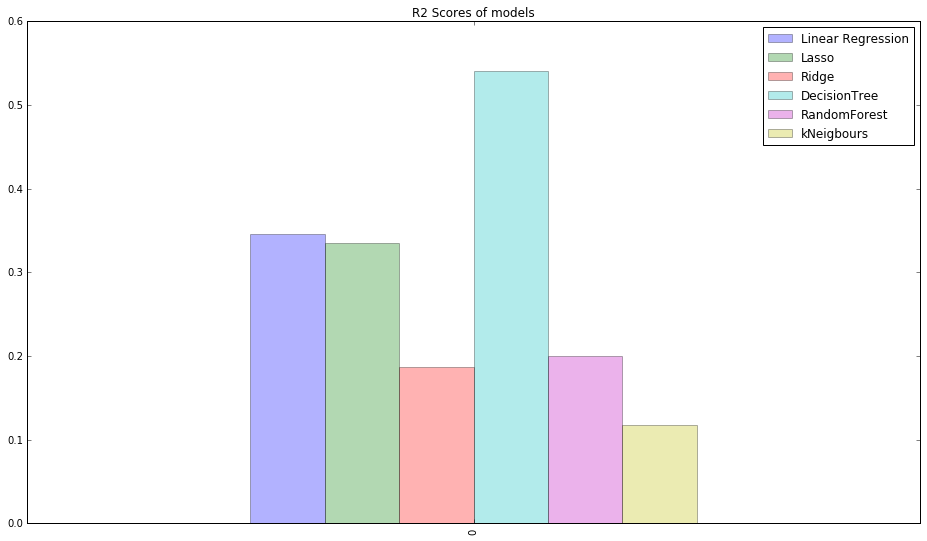

In [147]:
scores.plot(kind = "bar", alpha = 0.3, title = "R2 Scores of models", figsize = (16, 9))


Посмотрим на важность признаков для Lasso и заметим, на обнуление некоторых из них (регуляризация в деле)

In [148]:
importances = lrLasso.coef_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, myData.columns[idx], importances[idx]))

Feature importances:
 1. feature 'higher' (1.2443)
 2. feature 'school_GP' (0.9645)
 3. feature 'sex_F' (0.5788)
 4. feature 'Fjob_teacher' (0.4605)
 5. feature 'studytime' (0.3155)
 6. feature 'Medu ' (0.2747)
 7. feature 'age  ' (0.1590)
 8. feature 'famrel' (0.1376)
 9. feature 'reason_reputation' (0.1333)
10. feature 'Fedu ' (0.1204)
11. feature 'activities' (0.0879)
12. feature 'guardian_father' (0.0024)
13. feature 'address_U' (0.0000)
14. feature 'Mjob_teacher' (0.0000)
15. feature 'school_MS' (-0.0000)
16. feature 'famsize_LE3' (0.0000)
17. feature 'Pstatus_A' (-0.0000)
18. feature 'Pstatus_T' (0.0000)
19. feature 'Mjob_at_home' (-0.0000)
20. feature 'Mjob_health' (0.0000)
21. feature 'Mjob_services' (0.0000)
22. feature 'Fjob_other' (0.0000)
23. feature 'Fjob_at_home' (-0.0000)
24. feature 'Fjob_health' (-0.0000)
25. feature 'traveltime' (0.0000)
26. feature 'internet' (0.0000)
27. feature 'reason_home' (0.0000)
28. feature 'reason_other' (-0.0000)
29. feature 'goout' (-0.0000

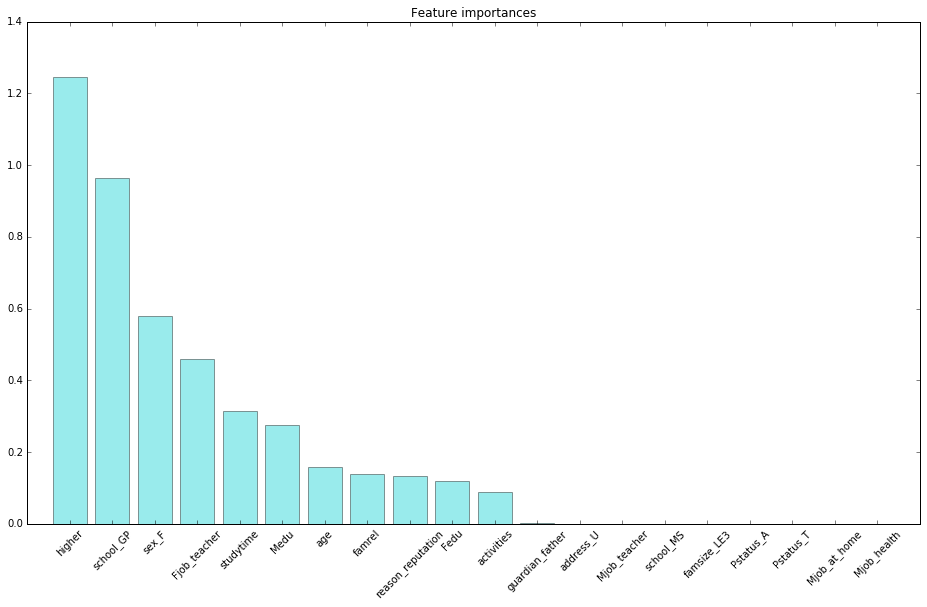

In [247]:
plt.figure(figsize=(16, 9))
plt.title("Feature importances")
plt.bar(range(len(myData.columns[:20])), importances[indices[:20]], align='center', color = 'darkturquoise', alpha = 0.4)
plt.xticks(range(len(myData.columns[:20])), np.array(myData.columns)[indices[:20]], rotation=45)
plt.xlim([-1, 20]);

## 3. Совершенствование лучшей модели.

Усовершенствуем показатели лучшей модели, посредством работы с признаками

### 3.1. Feature scaling

* Учитывая, что для tree-based моделей не важен масштаб признаков, проверим на регрессии, будет ли она лучше с масштабирвоанными признаками.

* Сначала нормализуем все признаки с помощью StandartScaler библиотеки sklearn

* Затем попробуем нормализовать вручную только числовые признаки и посмотрим, стало ли лучше

### 3.2. Корреляция

### 3.3. Еще одна модель

#### StandartScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(myData), columns = myData.columns)
scaled_target = pd.DataFrame(scaler.fit_transform(target))
scaled_train, scaled_test, sc_target_train, sc_target_test = train_test_split(scaled_data, scaled_target, test_size = 0.2)

In [ ]:
lr_scaled_Ridge = Ridge()
lr_scaled_Ridge.fit(scaled_data, scaled_target)

In [ ]:
alphas = np.arange(-50, 300)
sc_grid = GridSearchCV(lr_scaled_Ridge, param_grid=dict(alpha = alphas))
sc_grid.fit(scaled_data, scaled_target)
print(grid)
print("\nЛучшее значение гиперпараметра для Ridge: ", sc_grid.best_estimator_.alpha)

In [ ]:
tuned_scaled_ridge = Ridge(alpha = 227)
tuned_scaled_ridge.fit(scaled_train, sc_target_train)

In [ ]:
tnd_sc_ridgeError = np.sqrt(-(cross_val_score(tuned_scaled_ridge, scaled_test, sc_target_test, scoring='mean_squared_error',cv=5)))
tnd_sc_ridgeScore = tuned_scaled_ridge.score(scaled_test, sc_target_test)
print("Linear Regression RMSE: ", tnd_sc_ridgeError)
print("Linear Regression R2: ", lrScore)

Ошибка стала меньше, что очевидно, потому что величины сами по себе стали меньше, значит и разница между предсказанным значением оценки и настоящей. В то же время R2 не увеличилась.

Попробуем нормализовать только числовые признаки

#### Только числовые

In [190]:
scaled_numeric_df = numeric_df.copy(deep=True)
scaled_numeric_df = (scaled_numeric_df - scaled_numeric_df.mean()) / scaled_numeric_df.std()
scaled_data = pd.concat([pd.get_dummies(categorical_df), binary_df, scaled_numeric_df],axis=1)
scaled_data.drop(["G1", "G2", "G3"], axis = 1, inplace = True)

sc_train, sc_test, sc_target_train, sc_target_test = train_test_split(scaled_data, target, test_size = 0.2)

In [ ]:
lr_scaled_Ridge = Ridge()
lr_scaled_Ridge.fit(sc_train, sc_target_train)
alphas = np.arange(-50, 50)
sc_grid = GridSearchCV(lr_scaled_Ridge, param_grid=dict(alpha = alphas))
sc_grid.fit(scaled_data, target)
print(grid)
print("\nЛучшее значение гиперпараметра для Ridge: ", sc_grid.best_estimator_.alpha)

In [ ]:
tuned_scaled_ridge = Ridge(alpha = 14)
tuned_scaled_ridge.fit(scaled_train, sc_target_train)

In [ ]:
tnd_sc_ridgeError = np.sqrt(-(cross_val_score(tuned_scaled_ridge, scaled_test, sc_target_test, scoring='mean_squared_error',cv=5)))
tnd_sc_ridgeScore = tuned_scaled_ridge.score(scaled_test, sc_target_test)
print("Linear Regression RMSE: ", tnd_sc_ridgeError)
print("Linear Regression R2: ", lrScore)
tuned_scaled_ridge.

Показатели не улучшились - масштабирование никак не помогает

#### Корреляция

Попробуем отобрать признаки. Это не имеет смысла для регрессий с регуляризацией, так как там это происходит синтетически, посредством обнуления весов некоторых признаков (видно на картинке "Feature Importance" выше)

Обратим внимание на модель, показавшую лучший результат, и вручную отберем признаки, посмотрев на их корреляцию.

([<matplotlib.axis.YTick at 0x18da4cdfef0>,
 <a list of 11 Text yticklabel objects>)

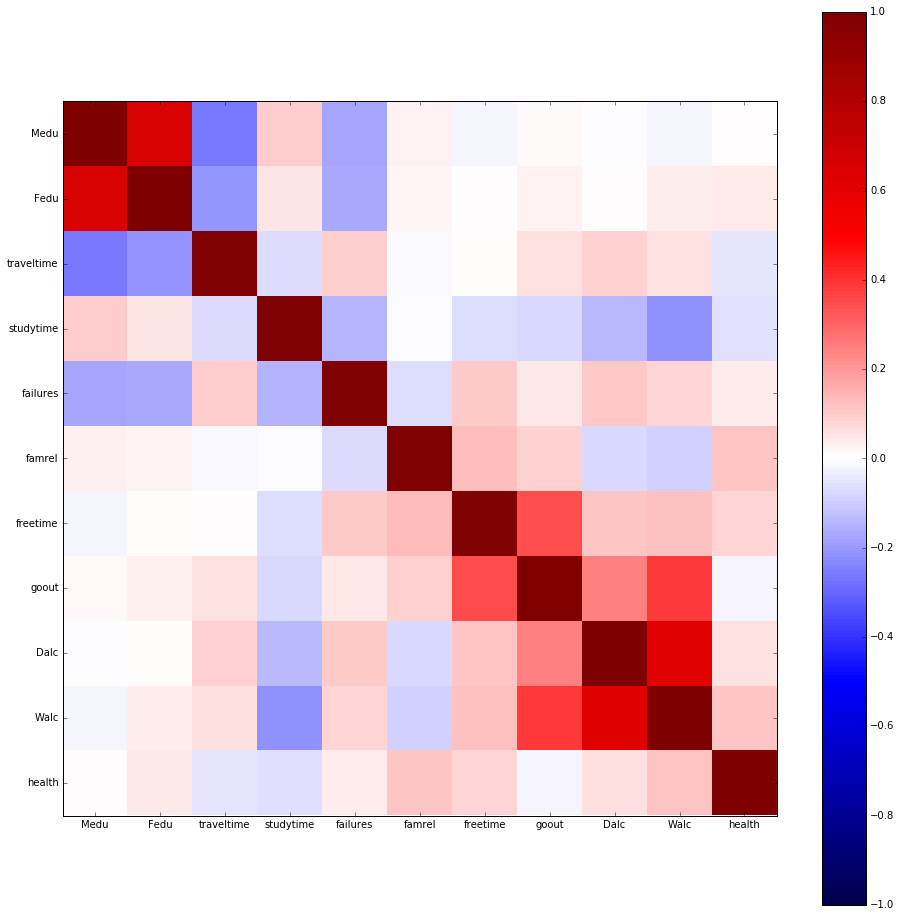

In [189]:
corr_data = data.corr() # corr() сама опускает нечисловые признаки и поэтому мы можем сам

plt.figure(figsize = (16, 16))
plt.imshow(corr_data,cmap='seismic',interpolation='none',vmin=-1,vmax=1, )
plt.colorbar()
plt.xticks(range(len(corr_data)),corr_data.columns)
plt.yticks(range(len(corr_data)),corr_data.columns)

Из визуализации корреляции между признаками выше видно:

   1. Оценки между собой очень сильно коррелируют. Собственно поэтому мы их сразу и убрали.
   2. Квадрат признаков goout, Dalc и Walc довольно красный. Хотя бы один признак можно убрать(Dalc например)
   3. Аналогично с Fedu, Medu. Можем оставить только Fedu
   
Посмотрим на то, будет ли DecisionTree иметь лучшие показатели, если выкинем из данных признаки, указанные выше.
Для удобства будем работать с новым DataFrame

In [297]:
new_data = myData.copy(deep=True)
new_data.drop(["Medu", "Dalc"], axis=1, inplace=True)
new_data_train, new_data_test, new_target_train, new_target_test = train_test_split(new_data, target, test_size=0.2)

In [265]:
tuning = [{'min_samples_split': splits, 'max_features': np.arange(10,47)}]

In [254]:
new_Dt = DecisionTreeRegressor(min_samples_split = 13, max_features = 26, random_state=50)
new_Dt.fit(new_data_train, new_target_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=26,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=13,
           min_weight_fraction_leaf=0.0, presort=False, random_state=50,
           splitter='best')

In [255]:
grid = GridSearchCV(estimator=new_Dt, param_grid=tuning)
grid.fit(new_data, target)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=26,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=13,
           min_weight_fraction_leaf=0.0, presort=False, random_state=50,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'min_samples_split': array([  1.     ,   1.28571,   1.57143,   1.85714,   2.14286,   2.42857,
         2.71429,   3.     ,   3.28571,   3.57143,   3.85714,   4.14286,
         4.42857,   4.71429,   5.     ,   5.28571,   5.57143,   5.85714,
         6.14286,   6.42857,   6.71429,   7.   ...26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46])}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [253]:
print("Лучшее значение параметров DecisionTreeRegressor: ")
print("min_samples_split ", grid.best_estimator_.min_samples_split)
print("max_features", grid.best_estimator_.max_features )

Лучшее значение параметров DecisionTreeRegressor: 
min_samples_split  14.1428571429
max_features 19


In [257]:
new_Tuned_Dt = DecisionTreeRegressor(min_samples_split = 14, max_features = 19, random_state=50)
new_Tuned_Dt.fit(new_data_train, new_target_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=19,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=14,
           min_weight_fraction_leaf=0.0, presort=False, random_state=50,
           splitter='best')

In [298]:
new_Tuned_DtError = np.sqrt(-(cross_val_score(new_Tuned_Dt, new_data_test, new_target_test, scoring='mean_squared_error',cv=5)))
new_Tuned_DtScore = new_Tuned_Dt.score(new_data_test, new_target_test)
print("DecisionTreeRegressor RMSE: ", new_Tuned_DtError)
print("DecisionTreeRegressor R2: ", new_Tuned_DtScore)

DecisionTreeRegressor RMSE:  [ 2.45471148  4.03692934  3.5952066   2.5830261   2.96658065]
DecisionTreeRegressor R2:  0.457104738581


Как видно, лучше не стало.